# SKEKB Beam Beam Test

## Python Setup

In [1]:
import sys

import xobjects as xo
import xtrack as xt
import xfields as xf
import xpart as xp

from xtrack.slicing import Teapot, Strategy

from cpymad.madx import Madx

import numpy as np
import scipy.constants as cst
import matplotlib.pyplot as plt

## User Variables

In [2]:
########################################
# Simulation Settings
########################################
n_turns             = int(1E2)
n_macroparticles    = int(1E5)
n_slices            = int(101)

########################################
# File Paths
########################################
ler_path            = "/Users/jack/Desktop/*Thesis/Analysis/superkekb/no_sol/sler_1707_80_1_nosol_simple.seq"
her_path            = "/Users/jack/Desktop/*Thesis/Analysis/superkekb/no_sol/sher_5781_60_1_nosol_simple.seq"

########################################
# Computation Mode
########################################
context = xo.ContextCpu(omp_num_threads='auto')

## Machine Parameters

### Pre LS1 Parameters

In [3]:
########################################
# HER Parameters
########################################
her_params = {
    'energy':           7.007,
    'p0c':              7.007E9,
    'bunch_intensity':  3.07E10,
    'n_bunches':        2249,
    'beta_x':           60E-3,
    'beta_y':           1.0E-3,
    'physemit_x':       4.59E-9,
    'physemit_y':       4.62E-11,
    'lattemit_y':       1.00E-11, #Guess
    'Qx':               45.532,
    'Qy':               43.573,
    'sigma_delta':      1.00E-3,
    'sigma_z':          5.10E-3,
    'phi':              41.5E-3,
    'circumference':    3016.315,
}

########################################
# LER Parameters
########################################
ler_params = {
    'energy':           4.00,
    'p0c':              4.0E9,
    'bunch_intensity':  3.69E10,
    'n_bunches':        2249,
    'beta_x':           80E-3,
    'beta_y':           1.0E-3,
    'physemit_x':       4.01E-9,
    'physemit_y':       4.62E-11,
    'lattemit_y':       1.00E-11, #Guess
    'Qx':               44.525,
    'Qy':               46.589,
    'sigma_delta':      1.00E-3,
    'sigma_z':          4.60E-3,
    'phi':              41.5E-3,
    'circumference':    3016.315,
}

########################################
# Constants
########################################
mass0               = xp.ELECTRON_MASS_EV

## Load LER

In [4]:
mad = Madx(
    stdout=sys.stdout # Needs to be set to sys.stdout or breaks
)
print("MADX Spawned")
mad.input(
f"""
    SET, FORMAT="19.15f";
    !option, echo;
    option, update_from_parent=true; // new option in mad-x as of 2/2019

    BEAM, PARTICLE=POSITRON, ENERGY={ler_params['energy']};

    CALL, FILE="{ler_path}";

    USE, SEQUENCE=ASC;
    
    SXT_ON = 1;
    RF_ON =1;
        
    USE,SEQUENCE=ASC;
        TWISS;

"""
)
ler = xt.Line.from_madx_sequence(
        mad.sequence['ASC'],
        allow_thick=True,
        deferred_expressions=True,
    )
print("Line Built from MADX Sequence")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.12.04               +
  + Execution date: 2024.05.13 20:06:11      +
  ++++++++++++++++++++++++++++++++++++++++++++
MADX Spawned
!

!SAD2MADX V0.4.1 (11/5/2018)

!Conversion of seq_ler at Sat Apr 27 10:13:23 CEST 2024

!

AXISAD =-2.3105151911690732e-11; BXISAD =.08000000000342304; AYISAD =-9.234472148971401e-11; BYISAD =.0010000000000005705; EXISAD =2.802972170610218e-13; EPXISAD =2.262517074610412e-13; EYISAD =2.650075255569153e-17; EPYISAD =-9.846063661244911e-16;

K1QC1LP = -5.064472726622586;

LQC1LP = .34;

K1QC2LP = 2.1009027988160134;

LQC2LP = .41;

LQKALP = .3444;

ANGLEBLC1LP1 = -.02478873839787652;

LBLC1LP1 = 1.6031209539205753;

ANGLEBLC1LP2 = -.009702723135905122;

LBLC1LP2 = 2.2353772314445624;

LQKBLP = .3444;

LZDS1LP = .25;

K1QLC1LP = -.29843291935174393;

LQLC1LP = .58372;

LQKCLP = .3444;

LZDS2LP = 

Converting sequence "asc":   0%|          | 0/2629 [00:00<?, ?it/s]

Line Built from MADX Sequence


## Load HER

In [5]:
mad = Madx(
    stdout=sys.stdout # Needs to be set to sys.stdout or breaks
)
print("MADX Spawned")
mad.input(
f"""
    SET, FORMAT="19.15f";
    !option, echo;
    option, update_from_parent=true; // new option in mad-x as of 2/2019

    BEAM, PARTICLE=POSITRON, ENERGY={her_params['energy']};

    CALL, FILE="{her_path}";

    USE, SEQUENCE=ASCE;
    
    SXT_ON = 1;
    RF_ON =1;
        
    USE,SEQUENCE=ASCE;
        TWISS;

"""
)
her = xt.Line.from_madx_sequence(
        mad.sequence['ASCE'],
        allow_thick=True,
        deferred_expressions=True,
    )
print("Line Built from MADX Sequence")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.12.04               +
  + Execution date: 2024.05.13 20:06:16      +
  ++++++++++++++++++++++++++++++++++++++++++++
MADX Spawned
!

!SAD2MADX V0.4.1 (11/5/2018)

!Conversion of seq_her at Mon Apr 29 11:29:08 CEST 2024

!

AXISAD =-3.151932671210428e-11; BXISAD =.06000000000139228; AYISAD =-7.403821733277181e-11; BYISAD =.000999999999964614; EXISAD =6.162622182789366e-14; EPXISAD =5.19956330537099e-13; EYISAD =-8.409904814971869e-19; EPYISAD =3.9923543874263796e-14;

K1QC1LPE = -.1575705826913016;

LQC1LPE = .34;

K1QC1LE = -3.038483975272519;

LQC1LE = .38;

K1QC2LE = 1.2128090028407266;

LQC2LE = .54;

LQKALE = .3444;

K1QLC2LE = .0288552353674626;

LQLC2LE = .53815;

LQKBLE = .3444;

ANGLEBLC1LE = -.005910469661515972;

LBLC1LE = 3.6026247561264007;

LQKCLE = .3444;

K1QLC3LE = -.3081750281243421;

LQLC3LE = .57004;

K1

Converting sequence "asce":   0%|          | 0/2475 [00:00<?, ?it/s]

Line Built from MADX Sequence


## Slicing

In [6]:
# define strategy for elements and perform slicing
slicing_strategies = [
    Strategy(slicing=Teapot(1)),  # Default catch-all as in MAD-X
    Strategy(slicing=Teapot(4), element_type=xt.Bend),
    Strategy(slicing=Teapot(5), element_type=xt.Quadrupole),
    Strategy(slicing=Teapot(4), element_type=xt.Sextupole),
]

ler.discard_tracker()
her.discard_tracker()
print("Slicing thick elements...")
ler.slice_thick_elements(slicing_strategies)
her.slice_thick_elements(slicing_strategies)

Slicing thick elements...


Slicing line:   0%|          | 0/2629 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/2475 [00:00<?, ?it/s]

## Build Reference Particles

In [7]:
ler_ref_particle = xp.Particles(
    mass0   = xp.ELECTRON_MASS_EV,
    q0      = 1,
    p0c     = ler_params['p0c']
    )
her_ref_particle = xp.Particles(
    mass0   = xp.ELECTRON_MASS_EV,
    q0      = -1,
    p0c     = her_params['p0c']
    )
ler.particle_ref = ler_ref_particle
her.particle_ref = her_ref_particle

ler.build_tracker()
her.build_tracker()
ler.config.XTRACK_USE_EXACT_DRIFTS = True
her.config.XTRACK_USE_EXACT_DRIFTS = True

Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


## Correct RF

In [8]:
ler_table = ler.get_table()
ler_cavities = ler_table.rows[ler_table.element_type=='Cavity']

for nn in ler_cavities.name:
    ler.element_refs[nn].lag = 180

In [9]:
her_table = her.get_table()
her_cavities = her_table.rows[her_table.element_type=='Cavity']

for nn in her_cavities.name:
    her.element_refs[nn].lag = 180

## Twiss in XSuite

In [10]:
ler_tw_4d = ler.twiss(eneloss_and_damping=False, method="4d")
print(f"LER: {(ler_tw_4d.qx, ler_tw_4d.qy)}")
her_tw_4d = her.twiss(eneloss_and_damping=False, method="4d")
print(f"HER: {(her_tw_4d.qx, her_tw_4d.qy)}")

Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
LER: (44.61091643171956, 46.248745180309996)
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
HER: (45.600806796500564, 43.67092339546591)


## Configure Radiation

In [11]:
ler.configure_radiation(model='mean')
ler.compensate_radiation_energy_loss()

her.configure_radiation(model='mean')
her.compensate_radiation_energy_loss()

Compensating energy loss.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Share energy loss among cavities (repeat until energy loss is zero)
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Energy loss: 376761.869 eV             
Energy loss: 63.033 eV             
Energy loss: 0.011 eV             

  - Set delta_taper
  - Restore cavity voltage and frequency. Set cavity lag
Compensating energy loss.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Share energy loss among cavities (repeat until energy loss is zero)
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Energy loss: 2089654.724 eV             
Energy loss: 1509.096 eV             
Energy loss: 1.090 eV             
Energy loss: 0.001 eV             

  - Set delta_taper
  - Restore cavity voltage and frequency. Set cavity lag


## Vertical Emittance Matching

In [12]:
# TODO Do this with sextupole offset tuning

## Twiss

In [13]:
ler_tw_rad = ler.twiss(eneloss_and_damping=True, method="6d")
print(f"LER: {(ler_tw_rad['eq_gemitt_x'], ler_tw_rad['eq_gemitt_y'])}")

Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
LER: (5.696751003226023e-09, 5.198292435005103e-13)


In [14]:
her_tw_rad = her.twiss(eneloss_and_damping=True, method="6d")
print(f"HER: {(her_tw_rad['eq_gemitt_x'], her_tw_rad['eq_gemitt_y'])}")

Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
HER: (5.402063336979289e-09, 2.191428230209451e-37)


### HER

(0.06, 0.001)
(0.06751166849488763, 0.0011786797367039188)


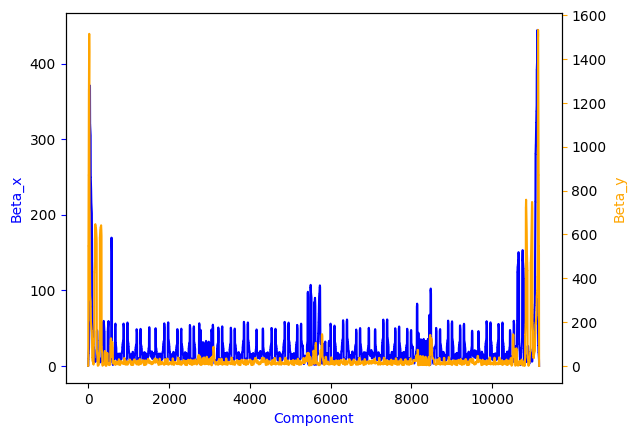

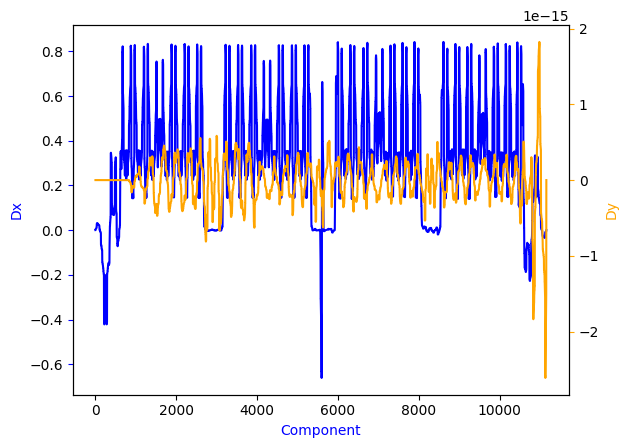

In [15]:
print((her_params['beta_x'], her_params['beta_y']))
print((min(her_tw_rad['betx']), min(her_tw_rad['bety'])))

fig, ax1 = plt.subplots()

ax1.set_xlabel('Component', c='b')
ax1.set_ylabel('Beta_x', c='b')
ax1.plot(her_tw_rad['betx'], c='b')
ax1.tick_params(axis='y', color='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Beta_y', c='orange')
ax2.plot(her_tw_rad['bety'], c='orange')
ax2.tick_params(axis='y', color='orange')

plt.show()

fig, ax1 = plt.subplots()

ax1.set_xlabel('Component', c='b')
ax1.set_ylabel('Dx', c='b')
ax1.plot(her_tw_rad['dx'], c='b')
ax1.tick_params(axis='y', color='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Dy', c='orange')
ax2.plot(her_tw_rad['dy'], c='orange')
ax2.tick_params(axis='y', color='orange')

plt.show()

### LER

(0.08, 0.001)
(0.07074241907486278, 0.0012068272261438803)


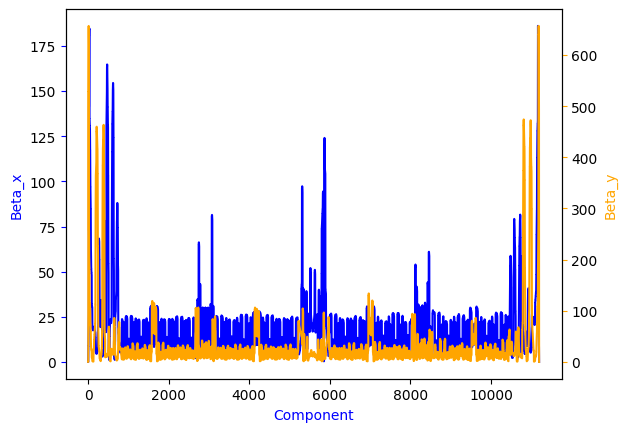

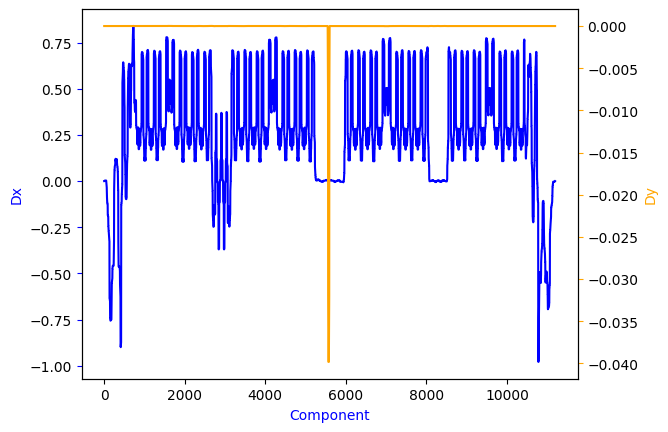

In [16]:
print((ler_params['beta_x'], ler_params['beta_y']))
print((min(ler_tw_rad['betx']), min(ler_tw_rad['bety'])))

fig, ax1 = plt.subplots()

ax1.set_xlabel('Component', c='b')
ax1.set_ylabel('Beta_x', c='b')
ax1.plot(ler_tw_rad['betx'], c='b')
ax1.tick_params(axis='y', color='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Beta_y', c='orange')
ax2.plot(ler_tw_rad['bety'], c='orange')
ax2.tick_params(axis='y', color='orange')

plt.show()

fig, ax1 = plt.subplots()

ax1.set_xlabel('Component', c='b')
ax1.set_ylabel('Dx', c='b')
ax1.plot(ler_tw_rad['dx'], c='b')
ax1.tick_params(axis='y', color='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Dy', c='orange')
ax2.plot(ler_tw_rad['dy'], c='orange')
ax2.tick_params(axis='y', color='orange')

plt.show()

## Generate Particles

In [17]:
# electrons = xp.generate_matched_gaussian_bunch(
#     num_particles               = n_macroparticles,
#     total_intensity_particles   = her_params['bunch_intensity'],
#     nemitt_x                    = her_tw_rad['eq_nemitt_x'],
#     nemitt_y                    = her_tw_rad['eq_nemitt_y'],
#     sigma_z                     = np.sqrt(her_tw_rad['bets0'] * her_tw_rad['eq_gemitt_zeta']),
#     line                        = her
# )   
# electrons.name = "electrons"
# electrons._init_random_number_generator() # pylint:disable=protected-access

# positrons = xp.generate_matched_gaussian_bunch(
#     num_particles               = n_macroparticles,
#     total_intensity_particles   = ler_params['bunch_intensity'],
#     nemitt_x                    = ler_tw_rad['eq_nemitt_x'],
#     nemitt_y                    = ler_tw_rad['eq_nemitt_y'],
#     sigma_z                     = np.sqrt(ler_tw_rad['bets0'] * ler_tw_rad['eq_gemitt_zeta']),
#     line                        = ler
# )   
# positrons.name = "positrons"
# positrons._init_random_number_generator() # pylint:disable=protected-access

# FOR NOW USE VERTICAL EMIT FROM LER FOR BOTH BECAUSE OF ISSUE WITH VERTICAL

In [18]:
electrons = xp.generate_matched_gaussian_bunch(
    num_particles               = n_macroparticles,
    total_intensity_particles   = her_params['bunch_intensity'],
    nemitt_x                    = her_tw_rad['eq_nemitt_x'],
    nemitt_y                    = ler_tw_rad['eq_nemitt_y'],
    sigma_z                     = np.sqrt(her_tw_rad['bets0'] * her_tw_rad['eq_gemitt_zeta']),
    line                        = her
)   
electrons.name = "electrons"
electrons._init_random_number_generator() # pylint:disable=protected-access

positrons = xp.generate_matched_gaussian_bunch(
    num_particles               = n_macroparticles,
    total_intensity_particles   = ler_params['bunch_intensity'],
    nemitt_x                    = ler_tw_rad['eq_nemitt_x'],
    nemitt_y                    = ler_tw_rad['eq_nemitt_y'],
    sigma_z                     = np.sqrt(ler_tw_rad['bets0'] * ler_tw_rad['eq_gemitt_zeta']),
    line                        = ler
)   
positrons.name = "positrons"
positrons._init_random_number_generator() # pylint:disable=protected-access

## Add Beam Beam Elements

### Slicer

In [19]:
ler_slicer = xf.TempSlicer(
    n_slices    = n_slices,
    sigma_z     = np.sqrt(ler_tw_rad['bets0'] * ler_tw_rad['eq_gemitt_zeta']), 
    mode        = "shatilov"
)
her_slicer = xf.TempSlicer(
    n_slices    = n_slices,
    sigma_z     = np.sqrt(her_tw_rad['bets0'] * her_tw_rad['eq_gemitt_zeta']),
    mode        = "shatilov"
)

Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.


## Pipeline

In [20]:
pipeline_manager = xt.PipelineManager()

pipeline_manager.add_particles('electrons',0)
pipeline_manager.add_particles('positrons',0)

pipeline_manager.add_element('IP')

electrons.init_pipeline('electrons')
positrons.init_pipeline('positrons')

### Update Configurations

In [21]:
config_IP_her = xf.ConfigForUpdateBeamBeamBiGaussian3D(
   pipeline_manager        = pipeline_manager,
   element_name            = 'IP',
   partner_particles_name  = 'positrons',
   slicer                  = her_slicer,
   update_every            = 1,
)

config_IP_ler = xf.ConfigForUpdateBeamBeamBiGaussian3D(
   pipeline_manager        = pipeline_manager,
   element_name            = 'IP',
   partner_particles_name  = 'electrons',
   slicer                  = ler_slicer,
   update_every            = 1,
)

### Beam Beam Elements

In [22]:
bbeam_ler = xf.BeamBeamBiGaussian3D(
    _context            = context,
    other_beam_q0       = electrons.q0,
    phi                 = ler_params['phi'],
    alpha               = 0,
    config_for_update   = config_IP_ler,
    flag_luminosity     = 1,
)
bbeam_her = xf.BeamBeamBiGaussian3D(
    _context            = context,
    other_beam_q0       = positrons.q0,
    phi                 = her_params['phi'],
    alpha               = 0,
    config_for_update   = config_IP_her,
    flag_luminosity     = 1,
)

### Insert BB Elements

In [23]:
ler.discard_tracker()
her.discard_tracker()

ler.insert_element(
    index   = 'ip.2',
    element = bbeam_ler,
    name    = f'beambeam_ler'
)

her.insert_element(
    index   = 'ip.2',
    element = bbeam_her,
    name    = f'beambeam_her'
)

## Build Trackers

In [24]:
ler.build_tracker(
    _context                = context,
    use_prebuilt_kernels    = False
)
her.build_tracker(
    _context                = context,
    use_prebuilt_kernels    = False
)

Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.


## Configure Radiation

In [25]:
ler.configure_radiation(
    model               = 'quantum',
    model_beamstrahlung = 'quantum'
)
her.configure_radiation(
    model               = 'quantum',
    model_beamstrahlung = 'quantum'
)

## Build Multitracker

In [26]:
branch_electrons    = xt.PipelineBranch(her, electrons)
branch_positrons    = xt.PipelineBranch(ler, positrons)
multitracker        = xt.PipelineMultiTracker(branches=[branch_electrons, branch_positrons])

## Create Tracking Records

In [27]:
record_electrons = {
    "turn": [],
    "alive": [],
    "luminosity": [],
    "photon_power": [],
    "x_av": [],
    "px_av": [],
    "y_av": [],
    "py_av": [],
    "z_av": [],
    "delta_av": [],
    "x_std": [],
    "px_std": [],
    "y_std": [],
    "py_std": [],
    "z_std": [],
    "delta_std": [],
    'emit_x':[],
    'emit_y':[],
    'emit_z':[],
    'u_bs':[]
}

record_positrons = {
    "turn": [],
    "alive": [],
    "luminosity": [],
    "photon_power": [],
    "x_av": [],
    "px_av": [],
    "y_av": [],
    "py_av": [],
    "z_av": [],
    "delta_av": [],
    "x_std": [],
    "px_std": [],
    "y_std": [],
    "py_std": [],
    "z_std": [],
    "delta_std": [],
    'emit_x':[],
    'emit_y':[],
    'emit_z':[],
    'u_bs':[]
}

## Scaling Functions

In [28]:
def power_scale(energy, params):
    power = (
        energy *
        cst.e * # Convert to J
        1E-3 * # Convert to kJ
        params['n_bunches'] * # Bunches per train
        ( cst.c / params['circumference'] ) * # Crossings per second
        ( params['bunch_intensity'] / n_macroparticles )
    )
    return power

def lumi_scale(crossing_luminosity, params):
    luminosity = (
        crossing_luminosity * 
        1E-4 * #m^-2 -> cm^-2
        params['n_bunches'] * # Bunches per train
        ( cst.c / params['circumference'] ) * #times each bunch passes the IP in 1s
        1E-34
    )
    return luminosity

## Initial Values

In [29]:
def number_alive(particles):
    return np.sum(particles.state[particles.state==1])

def averages(particles):
    x_av     = np.mean(particles.x[particles.state==1]    , axis=0)
    px_av    = np.mean(particles.px[particles.state==1]   , axis=0)
    y_av     = np.mean(particles.y[particles.state==1]    , axis=0)
    py_av    = np.mean(particles.py[particles.state==1]   , axis=0)
    z_av     = np.mean(particles.zeta[particles.state==1] , axis=0)
    delta_av = np.mean(particles.delta[particles.state==1], axis=0)
    return (x_av, px_av, y_av, py_av, z_av, delta_av)

def standard_deviations(particles):
    x_std     = np.std(particles.x[particles.state==1]    , axis=0)
    px_std    = np.std(particles.px[particles.state==1]   , axis=0)
    y_std     = np.std(particles.y[particles.state==1]    , axis=0)
    py_std    = np.std(particles.py[particles.state==1]   , axis=0)
    z_std     = np.std(particles.zeta[particles.state==1] , axis=0)
    delta_std = np.std(particles.delta[particles.state==1], axis=0)
    return (x_std, px_std, y_std, py_std, z_std, delta_std)

def emittances(particles):
    emit_x = np.sqrt(
        np.mean(( particles.x[particles.state==1] -  np.mean(particles.x[particles.state==1], axis=0))**2, axis=0) *\
        np.mean((particles.px[particles.state==1] - np.mean(particles.px[particles.state==1], axis=0))**2, axis=0) -\
        np.mean(( particles.x[particles.state==1] -  np.mean(particles.x[particles.state==1], axis=0)) *\
        (particles.px[particles.state==1] - np.mean(particles.px[particles.state==1], axis=0)), axis=0)**2
    )
    emit_y = np.sqrt(
        np.mean(( particles.y[particles.state==1] -  np.mean(particles.y[particles.state==1], axis=0))**2, axis=0) *\
        np.mean((particles.py[particles.state==1] - np.mean(particles.py[particles.state==1], axis=0))**2, axis=0) -\
        np.mean(( particles.y[particles.state==1] -  np.mean(particles.y[particles.state==1], axis=0)) *\
        (particles.py[particles.state==1] - np.mean(particles.py[particles.state==1], axis=0)), axis=0)**2
    )
    emit_z = np.sqrt(
        np.mean(( particles.zeta[particles.state==1] -  np.mean(particles.zeta[particles.state==1], axis=0))**2, axis=0) *\
        np.mean((particles.delta[particles.state==1] - np.mean(particles.delta[particles.state==1], axis=0))**2, axis=0) -\
        np.mean(( particles.zeta[particles.state==1] -  np.mean(particles.zeta[particles.state==1], axis=0)) *\
        (particles.delta[particles.state==1] - np.mean(particles.delta[particles.state==1], axis=0)), axis=0)**2
    )
    return (emit_x, emit_y, emit_z)

def append_to_records(record, turn, alive, average, stds, emit, luminosity, photon_power, bs_per_turn):
    record["turn"].append(turn)
    record["alive"].append(alive)
    record["x_av"].append(average[0])
    record["px_av"].append(average[1])
    record["y_av"].append(average[2])
    record["py_av"].append(average[3])
    record["z_av"].append(average[4])
    record["delta_av"].append(average[5])
    record["x_std"].append(stds[0])
    record["px_std"].append(stds[1])
    record["y_std"].append(stds[2])
    record["py_std"].append(stds[3])
    record["z_std"].append(stds[4])
    record["delta_std"].append(stds[5])
    record["emit_x"].append(emit[0])
    record["emit_y"].append(emit[1])
    record["emit_z"].append(emit[2])
    record["luminosity"].append(luminosity)
    record["photon_power"].append(photon_power)
    record["u_bs"].append(bs_per_turn)


In [30]:
append_to_records(
    record          = record_electrons,
    turn            = 0,
    alive           = number_alive(electrons),
    average         = averages(electrons),
    stds            = standard_deviations(electrons),
    emit            = emittances(electrons),
    luminosity      = 0,
    photon_power    = 0,
    bs_per_turn     = 0
)

append_to_records(
    record          = record_positrons,
    turn            = 0,
    alive           = number_alive(positrons),
    average         = averages(positrons),
    stds            = standard_deviations(positrons),
    emit            = emittances(positrons),
    luminosity      = 0,
    photon_power    = 0,
    bs_per_turn     = 0
)

## Track

In [31]:
for turn in range(n_turns):
    print(f"Turn: {turn+1}")

    radiation_record_electrons = her.start_internal_logging_for_elements_of_type(
        xf.BeamBeamBiGaussian3D,
        capacity={
            "beamstrahlungtable": int(n_macroparticles),
            "bhabhatable": int(0),
            "lumitable": int(n_turns),
    })
    radiation_record_positrons = ler.start_internal_logging_for_elements_of_type(
        xf.BeamBeamBiGaussian3D,
        capacity={
            "beamstrahlungtable": int(n_macroparticles),
            "bhabhatable": int(0),
            "lumitable": int(n_turns),
    })
    # track for 1 period
    multitracker.track(num_turns=1, turn_by_turn_monitor=True)

    ler.stop_internal_logging_for_elements_of_type(xf.BeamBeamBiGaussian3D)
    her.stop_internal_logging_for_elements_of_type(xf.BeamBeamBiGaussian3D)

    append_to_records(
        record          = record_electrons,
        turn            = turn + 1,
        alive           = number_alive(electrons),
        average         = averages(electrons),
        stds            = standard_deviations(electrons),
        emit            = emittances(electrons),
        luminosity      = lumi_scale(radiation_record_electrons.lumitable.luminosity[turn], params=her_params),
        photon_power    = power_scale(np.sum(radiation_record_electrons.beamstrahlungtable.photon_energy), params=her_params),
        bs_per_turn     = np.sum(radiation_record_electrons.beamstrahlungtable.photon_energy) / (1E9 * n_macroparticles)
    )

    append_to_records(
        record          = record_positrons,
        turn            = turn + 1,
        alive           = number_alive(positrons),
        average         = averages(positrons),
        stds            = standard_deviations(positrons),
        emit            = emittances(positrons),
        luminosity      = lumi_scale(radiation_record_positrons.lumitable.luminosity[turn], params=ler_params),
        photon_power    = power_scale(np.sum(radiation_record_positrons.beamstrahlungtable.photon_energy), params=ler_params),
        bs_per_turn     = np.sum(radiation_record_positrons.beamstrahlungtable.photon_energy) / (1E9 * n_macroparticles)
    )

    # Delete tracker records before next period
    ler.tracker._init_io_buffer()
    her.tracker._init_io_buffer()

Turn: 1
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


1649848c4e0c47bb8421516191dcccc9.c:8711:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
1649848c4e0c47bb8421516191dcccc9.c:8979:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
1649848c4e0c47bb8421516191dcccc9.c:9068:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
1649848c4e0c47bb8421516191dcccc9.c:9071:12: warning: unused variable 'e_loss_primary_tot' [-Wunused-variable]
    double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
           ^
1649848c4e0c47bb8421516191dcccc9.c:9324:21: warning: variable 'lumi_table_index' set but not used [-Wunused-but-set-variable]
        RecordIndex lumi_table_index     

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Turn: 2
Turn: 3
Turn: 4
Turn: 5
Turn: 6
Turn: 7
Turn: 8
Turn: 9
Turn: 10
Turn: 11
Turn: 12
Turn: 13
Turn: 14
Turn: 15
Turn: 16
Turn: 17
Turn: 18
Turn: 19
Turn: 20
Turn: 21
Turn: 22
Turn: 23
Turn: 24
Turn: 25
Turn: 26
Turn: 27
Turn: 28
Turn: 29
Turn: 30
Turn: 31
Turn: 32
Turn: 33
Turn: 34
Turn: 35
Turn: 36
Turn: 37
Turn: 38
Turn: 39
Turn: 40
Turn: 41
Turn: 42
Turn: 43
Turn: 44
Turn: 45
Turn: 46
Turn: 47
Turn: 48
Turn: 49
Turn: 50
Turn: 51
Turn: 52
Turn: 53
Turn: 54
Turn: 55
Turn: 56
Turn: 57
Turn: 58
Turn: 59
Turn: 60
Turn: 61
Turn: 62
Turn: 63
Turn: 64
Turn: 65
Turn: 66
Turn: 67
Turn: 68
Turn: 69
Turn: 70
Turn: 71
Turn: 72
Turn: 73
Turn: 74
Turn: 75
Turn: 76
Turn: 77
Turn: 78
Turn: 79
Turn: 80
Turn: 81
Turn: 82
Turn: 83
Turn: 84
Turn: 85
Turn: 86
Turn: 87
Turn: 88
Turn: 89
Turn: 90
Turn: 91
Turn: 92
Turn: 93
Turn: 94
Turn: 95
Turn: 96
Turn: 97
Turn: 98
Turn: 99
Turn: 100


## Plotting

/var/folders/vw/g5f93yf13pv2lpspzd_rzsfh0000gn/T/ipykernel_70359/3601494800.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


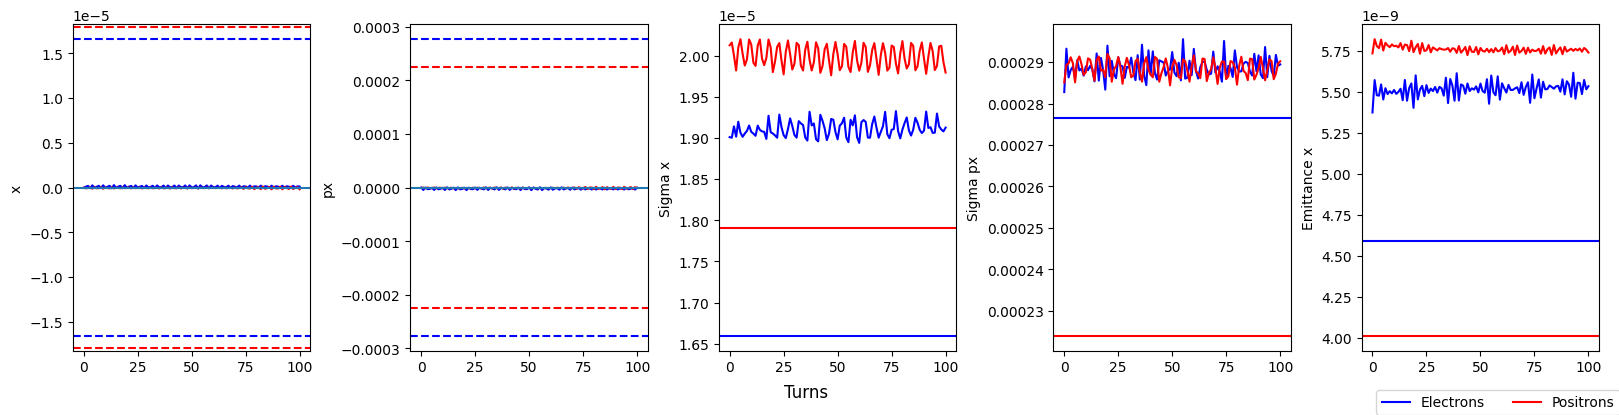

In [32]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), layout='constrained', sharex=True, sharey=False)

sigma_x_her     = np.sqrt(her_params['beta_x'] * her_params['physemit_x'])
sigma_px_her    = np.sqrt(her_params['physemit_x'] / her_params['beta_x'])
sigma_x_ler     = np.sqrt(ler_params['beta_x'] * ler_params['physemit_x'])
sigma_px_ler    = np.sqrt(ler_params['physemit_x'] / ler_params['beta_x'])

axs[0].plot(record_electrons["turn"], record_electrons["x_av"], label="electrons", c='b')
axs[0].plot(record_positrons["turn"], record_positrons["x_av"], label="positrons", c='r')
axs[0].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[0].axhline(y = sigma_x_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = -sigma_x_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = sigma_x_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].axhline(y = -sigma_x_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].set_ylabel('x')

axs[1].plot(record_electrons["turn"], record_electrons["px_av"], label="electrons", c='b')
axs[1].plot(record_positrons["turn"], record_positrons["px_av"], label="positrons", c='r')
axs[1].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[1].axhline(y = sigma_px_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = -sigma_px_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = sigma_px_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].axhline(y = -sigma_px_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].set_ylabel('px')

axs[2].plot(record_electrons["turn"], record_electrons["x_std"], label="electrons", c='b')
axs[2].plot(record_positrons["turn"], record_positrons["x_std"], label="positrons", c='r')
axs[2].axhline(y = sigma_x_her, xmin=0, xmax=n_turns+1, c='b')
axs[2].axhline(y = sigma_x_ler, xmin=0, xmax=n_turns+1, c='r')
axs[2].set_ylabel('Sigma x')

axs[3].plot(record_electrons["turn"], record_electrons["px_std"], label="electrons", c='b')
axs[3].plot(record_positrons["turn"], record_positrons["px_std"], label="positrons", c='r')
axs[3].axhline(y = sigma_px_her, xmin=0, xmax=n_turns+1, c='b')
axs[3].axhline(y = sigma_px_ler, xmin=0, xmax=n_turns+1, c='r')
axs[3].set_ylabel('Sigma px')

axs[4].plot(record_electrons["turn"], record_electrons["emit_x"], label="electrons", c='b')
axs[4].plot(record_positrons["turn"], record_positrons["emit_x"], label="positrons", c='r')
axs[4].axhline(y = her_params['physemit_x'], xmin=0, xmax=n_turns+1, c='b')
axs[4].axhline(y = ler_params['physemit_x'], xmin=0, xmax=n_turns+1, c='r')
axs[4].set_ylabel('Emittance x')

fig.legend(
    axs,
    labels=['Electrons', 'Positrons'],
    loc=(0.85,0.00),
    ncols=2
)

fig.supxlabel('Turns')
plt.show()

/var/folders/vw/g5f93yf13pv2lpspzd_rzsfh0000gn/T/ipykernel_70359/67895466.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


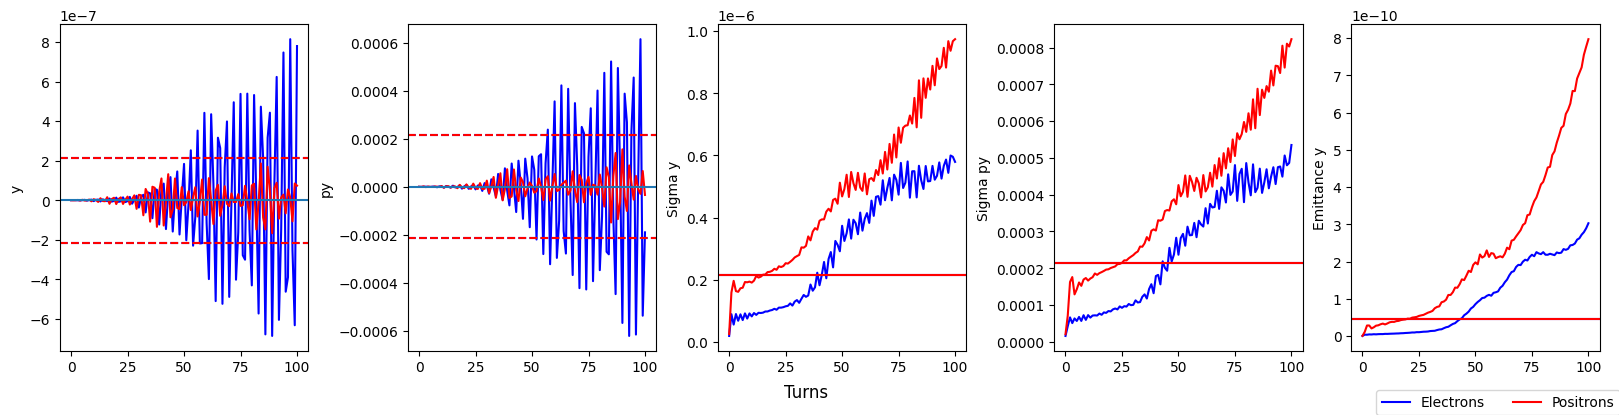

In [33]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), layout='constrained', sharex=True, sharey=False)

sigma_y_her     = np.sqrt(her_params['beta_y'] * her_params['physemit_y'])
sigma_py_her    = np.sqrt(her_params['physemit_y'] / her_params['beta_y'])
sigma_y_ler     = np.sqrt(ler_params['beta_y'] * ler_params['physemit_y'])
sigma_py_ler    = np.sqrt(ler_params['physemit_y'] / ler_params['beta_y'])

axs[0].plot(record_electrons["turn"], record_electrons["y_av"], label="electrons", c='b')
axs[0].plot(record_positrons["turn"], record_positrons["y_av"], label="positrons", c='r')
axs[0].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[0].axhline(y = sigma_y_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = -sigma_y_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = sigma_y_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].axhline(y = -sigma_y_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].set_ylabel('y')

axs[1].plot(record_electrons["turn"], record_electrons["py_av"], label="electrons", c='b')
axs[1].plot(record_positrons["turn"], record_positrons["py_av"], label="positrons", c='r')
axs[1].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[1].axhline(y = sigma_py_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = -sigma_py_her, xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = sigma_py_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].axhline(y = -sigma_py_ler, xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].set_ylabel('py')

axs[2].plot(record_electrons["turn"], record_electrons["y_std"], label="electrons", c='b')
axs[2].plot(record_positrons["turn"], record_positrons["y_std"], label="positrons", c='r')
axs[2].axhline(y = np.sqrt(her_params['beta_y'] * her_params['physemit_y']), xmin=0, xmax=n_turns+1, c='b')
axs[2].axhline(y = np.sqrt(ler_params['beta_y'] * ler_params['physemit_y']), xmin=0, xmax=n_turns+1, c='r')
axs[2].set_ylabel('Sigma y')

axs[3].plot(record_electrons["turn"], record_electrons["py_std"], label="electrons", c='b')
axs[3].plot(record_positrons["turn"], record_positrons["py_std"], label="positrons", c='r')
axs[3].axhline(y = np.sqrt(her_params['physemit_y'] / her_params['beta_y']), xmin=0, xmax=n_turns+1, c='b')
axs[3].axhline(y = np.sqrt(ler_params['physemit_y'] / ler_params['beta_y']), xmin=0, xmax=n_turns+1, c='r')
axs[3].set_ylabel('Sigma py')

axs[4].plot(record_electrons["turn"], record_electrons["emit_y"], label="electrons", c='b')
axs[4].plot(record_positrons["turn"], record_positrons["emit_y"], label="positrons", c='r')
axs[4].axhline(y=her_params['physemit_y'], xmin=0, xmax=n_turns+1, c='b')
axs[4].axhline(y=ler_params['physemit_y'], xmin=0, xmax=n_turns+1, c='r')
axs[4].set_ylabel('Emittance y')

fig.legend(
    axs,
    labels=['Electrons', 'Positrons'],
    loc=(0.85,0.0),
    ncols=2
)

fig.supxlabel('Turns')
plt.show()

/var/folders/vw/g5f93yf13pv2lpspzd_rzsfh0000gn/T/ipykernel_70359/3207864270.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


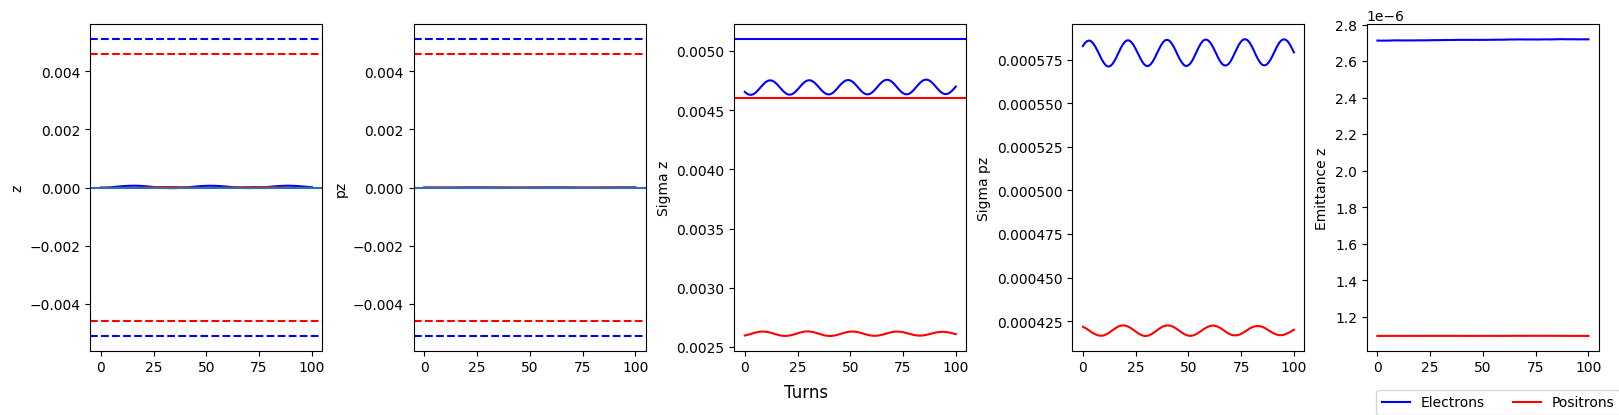

In [34]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), layout='constrained', sharex=True, sharey=False)

axs[0].plot(record_electrons["turn"], record_electrons["z_av"], label="electrons", c='b')
axs[0].plot(record_positrons["turn"], record_positrons["z_av"], label="positrons", c='r')
axs[0].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[0].axhline(y = her_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = -her_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[0].axhline(y = ler_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].axhline(y = -ler_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[0].set_ylabel('z')

axs[1].plot(record_electrons["turn"], record_electrons["delta_av"], label="electrons", c='b')
axs[1].plot(record_positrons["turn"], record_positrons["delta_av"], label="positrons", c='r')
axs[1].axhline(y=0, xmin=0, xmax=n_turns+1)
axs[1].axhline(y = her_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = -her_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='b')
axs[1].axhline(y = ler_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].axhline(y = -ler_params['sigma_z'], xmin=0, xmax=n_turns+1, linestyle='--', c='r')
axs[1].set_ylabel('pz')

axs[2].plot(record_electrons["turn"], record_electrons["z_std"], label="electrons", c='b')
axs[2].plot(record_positrons["turn"], record_positrons["z_std"], label="positrons", c='r')
axs[2].axhline(y = her_params['sigma_z'], xmin=0, xmax=n_turns+1, c='b')
axs[2].axhline(y = ler_params['sigma_z'], xmin=0, xmax=n_turns+1, c='r')
axs[2].set_ylabel('Sigma z')

axs[3].plot(record_electrons["turn"], record_electrons["delta_std"], label="electrons", c='b')
axs[3].plot(record_positrons["turn"], record_positrons["delta_std"], label="positrons", c='r')
axs[3].set_ylabel('Sigma pz')

axs[4].plot(record_electrons["turn"], record_electrons["emit_z"], label="electrons", c='b')
axs[4].plot(record_positrons["turn"], record_positrons["emit_z"], label="positrons", c='r')
axs[4].set_ylabel('Emittance z')

fig.legend(
    axs,
    labels=['Electrons', 'Positrons'],
    loc=(0.85,0.0),
    ncols=2
)

fig.supxlabel('Turns')
plt.show()

/var/folders/vw/g5f93yf13pv2lpspzd_rzsfh0000gn/T/ipykernel_70359/1867391388.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


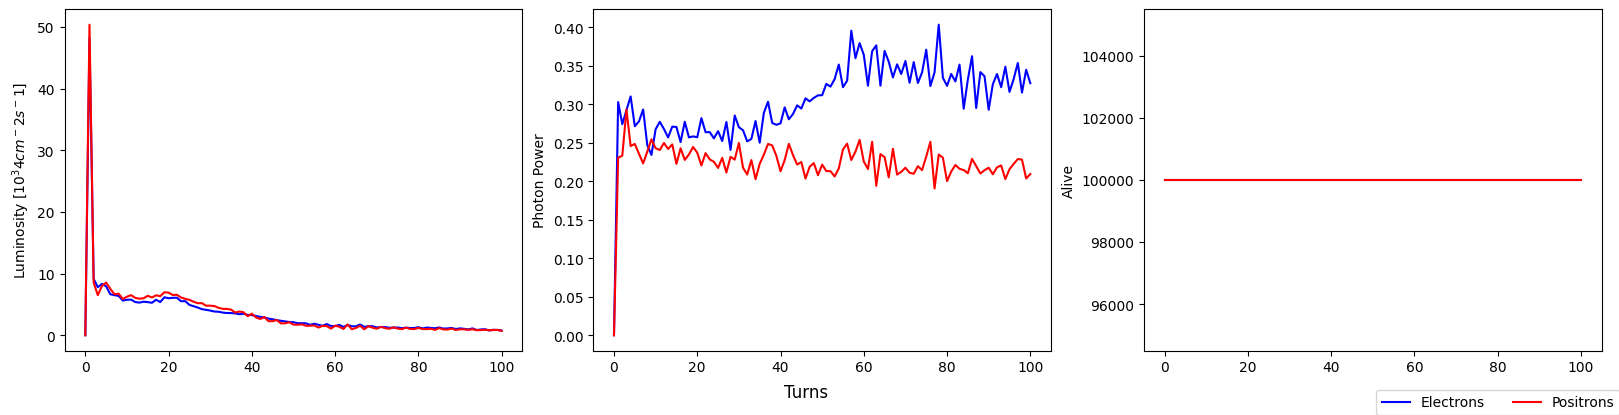

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4), layout='constrained', sharex=True, sharey=False)
axs[0].plot(record_electrons["turn"], record_electrons["luminosity"], label="electrons", c='b')
axs[0].plot(record_positrons["turn"], record_positrons["luminosity"], label="positrons", c='r')
axs[0].set_ylabel('Luminosity [$10^34 cm^-2 s^-1$]')

axs[1].plot(record_electrons["turn"], record_electrons["photon_power"], label="electrons", c='b')
axs[1].plot(record_positrons["turn"], record_positrons["photon_power"], label="positrons", c='r')
axs[1].set_ylabel('Photon Power')

axs[2].plot(record_electrons["turn"], record_electrons["alive"], label="electrons", c='b')
axs[2].plot(record_positrons["turn"], record_positrons["alive"], label="positrons", c='r')
axs[2].set_ylabel('Alive')

fig.legend(
    axs,
    labels=['Electrons', 'Positrons'],
    loc=(0.85,0.0),
    ncols=2
)

fig.supxlabel('Turns')
plt.show()